# Stress Detection with Machine Learning

Stress, anxiety, and depression are threatening the mental health of people. Every person has a reason for having a stressful life. People often share their feelings on social media platforms like on Instagram in the form of posts and stories, and on Reddit in the form of asking for suggestions about their life on subreddits. In the past few years, many content creators have come forward to create content to help people with their mental health. Many organizations can use stress detection to find which social media users are stressed

The dataset I am using for this task contains data posted on subreddits related to mental health. This dataset contains various mental health problems shared by people about their life. Fortunately, this dataset is labelled as 0 and 1, where 0 indicates no stress and 1 indicates stress. So in the section below, I will take you through the task of stress detection in social media posts using Python.

In [139]:
import pandas as pd
import numpy as np
data = pd.read_csv("stress.csv")
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [140]:
data.shape

(2838, 116)

In [141]:
pd.options.display.max_rows = None
print(data.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
label                       0
confidence                  0
social_timestamp            0
social_karma                0
syntax_ari                  0
lex_liwc_WC                 0
lex_liwc_Analytic           0
lex_liwc_Clout              0
lex_liwc_Authentic          0
lex_liwc_Tone               0
lex_liwc_WPS                0
lex_liwc_Sixltr             0
lex_liwc_Dic                0
lex_liwc_function           0
lex_liwc_pronoun            0
lex_liwc_ppron              0
lex_liwc_i                  0
lex_liwc_we                 0
lex_liwc_you                0
lex_liwc_shehe              0
lex_liwc_they               0
lex_liwc_ipron              0
lex_liwc_article            0
lex_liwc_prep               0
lex_liwc_auxverb            0
lex_liwc_adverb             0
lex_liwc_conj               0
lex_liwc_negate             0
lex_liwc_v

Luckily, there are no missing values found in the dataset

In [142]:
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [143]:
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [144]:
print(stopword)

{'any', "mustn't", 'in', 'mustn', 'yourself', 'again', 'out', 'didn', 'how', 'her', 'she', 'other', 'some', 'do', 'they', 'of', 'or', 'who', 'over', 'aren', 've', 'above', 'up', 'while', "isn't", 'y', 'it', 'having', 'which', 'me', 'there', 'wouldn', 'as', 'very', 'mightn', 'should', 'why', 'between', 'our', 'these', 'theirs', 'the', 'then', 'shan', 'wasn', 'until', 'such', 'further', 'its', 'my', 'ourselves', "that'll", "shan't", 'about', 'himself', 'hers', "couldn't", 'myself', 'into', 'with', 'what', 'under', 'only', 'he', 'below', 'yourselves', 'at', "you're", 'ours', "haven't", "shouldn't", 'against', 'themselves', 'be', 'him', 'after', "aren't", 's', "she's", 'was', 'to', 'you', 'because', 'have', "hadn't", 'now', 'don', 'm', "you'll", 'same', 'both', 'd', 'and', 'haven', 'down', 'them', 'not', 'nor', "should've", 'than', 'been', 'if', 'just', "you'd", 'once', 'whom', 'here', "weren't", 'am', 'so', "hasn't", 'your', 'hadn', 'isn', "didn't", 'were', 'o', 'own', 'does', 'we', 'bein

In [145]:
# removing the stop words and removing all punctuations from the text inputs

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

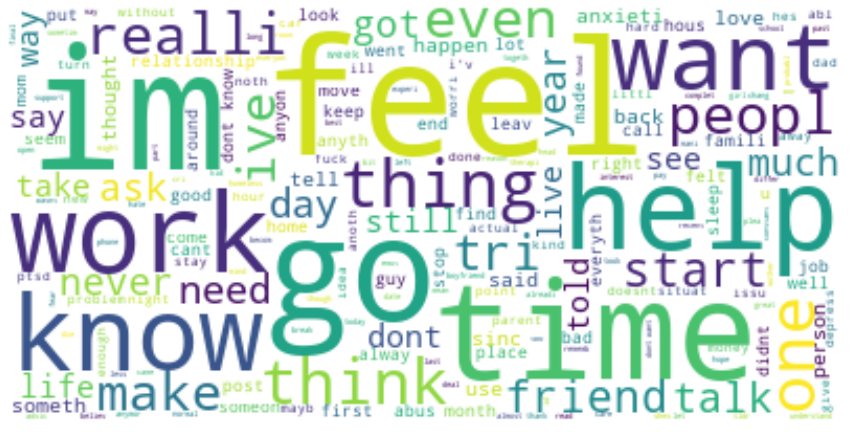

In [146]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [147]:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
data.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [148]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


estimator = BernoulliNB()

x = data[["text"]].values.ravel()
y = data["label"].values



#tokenization
tokenizer = CountVectorizer()

model = Pipeline(
    [
        ('tokenizer', tokenizer), 
        ('estimator',estimator),
     ]
)


xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.33, 
                                                random_state=42)
model.fit(xtrain, ytrain)

Pipeline(steps=[('tokenizer', CountVectorizer()), ('estimator', BernoulliNB())])

In [149]:
from sklearn.metrics import accuracy_score

test_preds = model.predict(xtest)
accuracy_score(ytest,test_preds)

0.7449306296691569

We have achieved over 74% accuracy on new data samples in predicting stress through text, Now, let's try using our own input and see how well the model performs

In [150]:
prompt = 'I feel very tired and i dont think i will be able to continue doing this'
output = model.predict([prompt])
print(output)

['No Stress']


In [151]:
import pickle
pickle.dump(model, open('stress_1.0.pkl', 'wb'))

In [152]:
!pip install -q gradio 

In [ ]:
import gradio as gr


def predict_stress(text):
  return model.predict([text])[0].upper()


demo = gr.Interface(
    fn = predict_stress,
    inputs=gr.Textbox(lines=2, placeholder="Enter Text Here...", label = 'Predicting Stress through text'),
    outputs = 'text',
)

demo.launch(debug = True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>